Part1. 데이터 분석 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# 0. 파일 불러오기
data = pd.read_csv('train.csv')

In [3]:
# 1. 결측치 확인하기
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


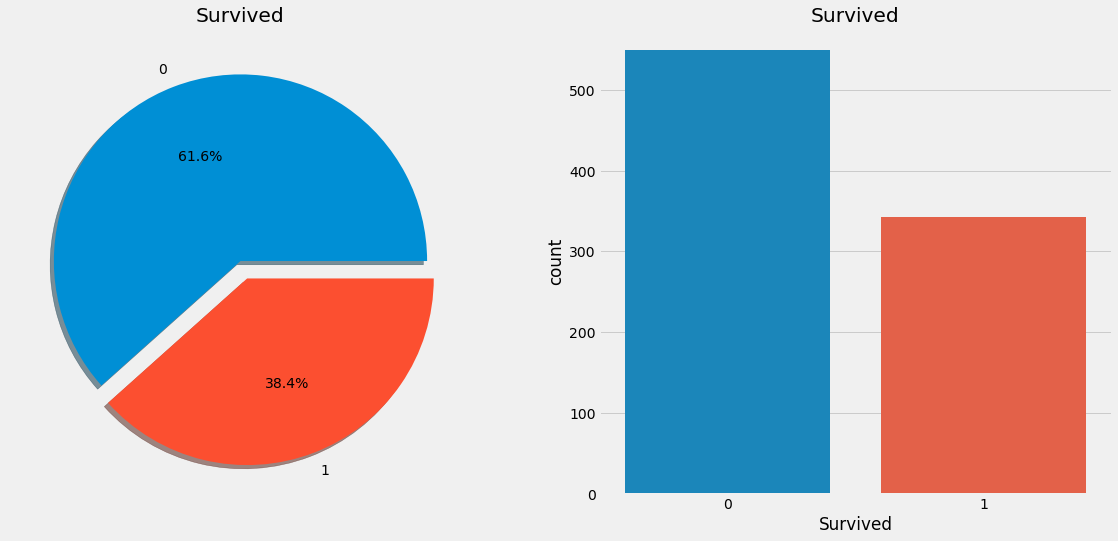

In [4]:
# 2. 생존자 비율 확인하기
f,ax= plt.subplots(1,2, figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode= [0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data= data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


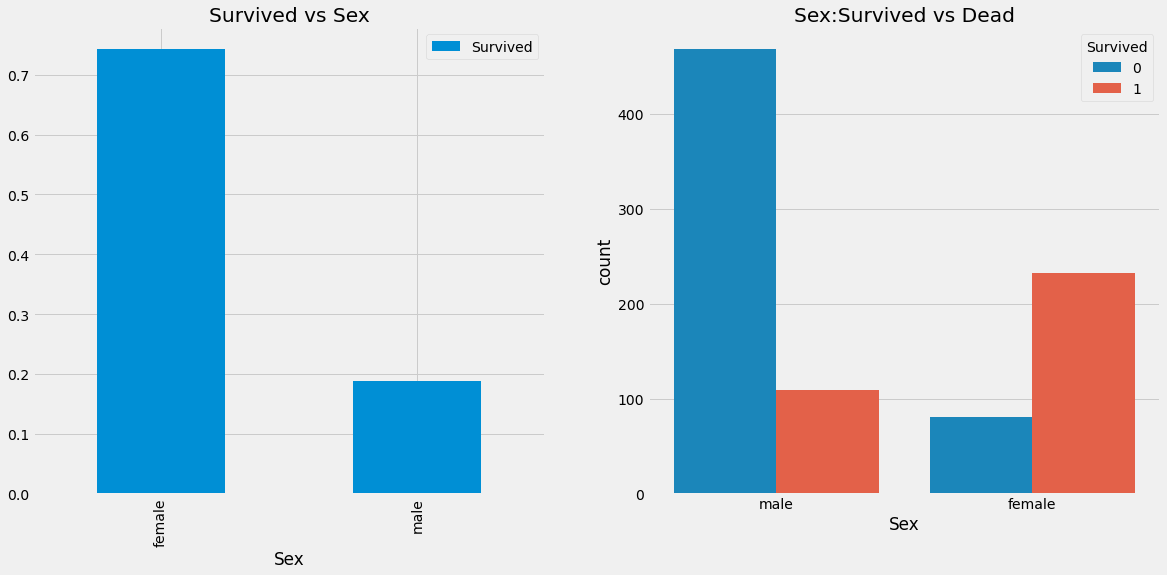

In [5]:
# 3. Sex 특성 분석
# 카테고리 특성: Categorical Features (예: 성별)
print(data.groupby(['Sex', 'Survived'])['Survived'].count())

f, ax= plt.subplots(1,2, figsize= (18, 8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax= ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue= 'Survived', data= data, ax= ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# 배에 타고 있는 남자의 수가 훨신 많지만 살아남은 비율은 낮다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


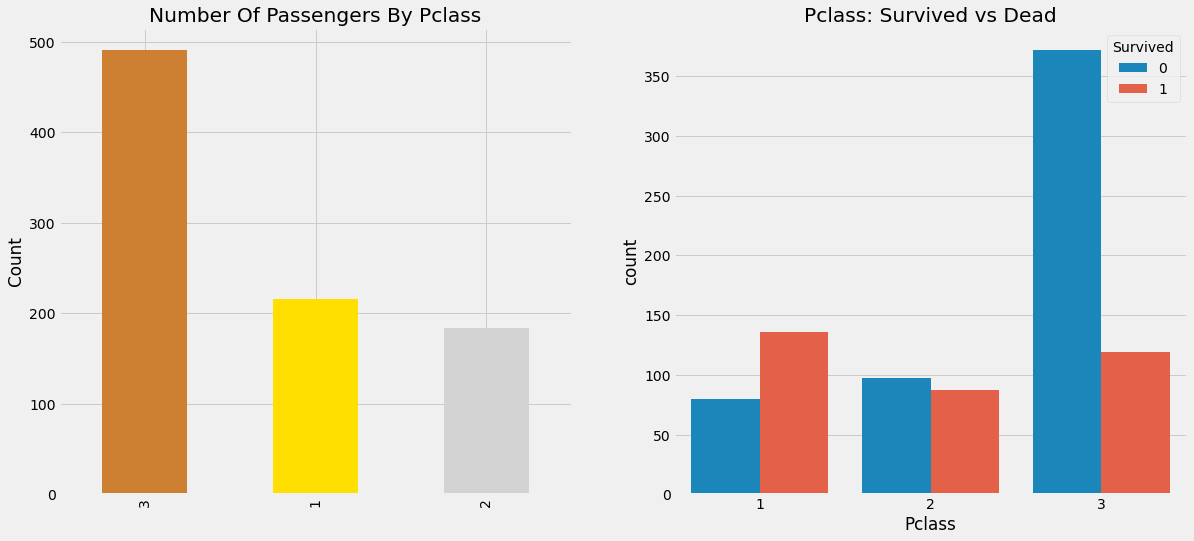

c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


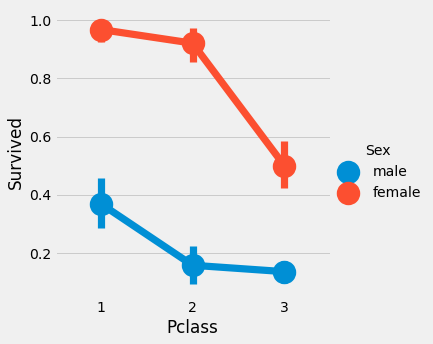

In [6]:
# 4. Pclass 특성 분석
# Ordinal Features : 서수 (ex. Tall, Medium, short)
# 1) 각 등급별 생존자
display(pd.crosstab(data.Pclass, data.Survived, margins= True).style.background_gradient(cmap= 'summer_r'))

f,ax= plt.subplots(1,2, figsize= (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax= ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue= 'Survived', data= data, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()
# 1등급 좌석에 탄 사람이 사망한 사람보다 생존한 사람이 더 많다.

# 2) 각 등급별, 성별 생존자
display(pd.crosstab([data.Sex, data.Survived], data.Pclass, margins= True).style.background_gradient(cmap= 'summer_r'))

sns.factorplot('Pclass', 'Survived', hue= 'Sex', data= data)
plt.show()
# 전체적으로 여성이 많이 살아남았고 등급이 낮아질수록 생존율이 떨어짐

가장 많은 나이: 80.0 살
가장 적은 나이: 0.42 살
평균 나이: 29.69911764705882 살


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


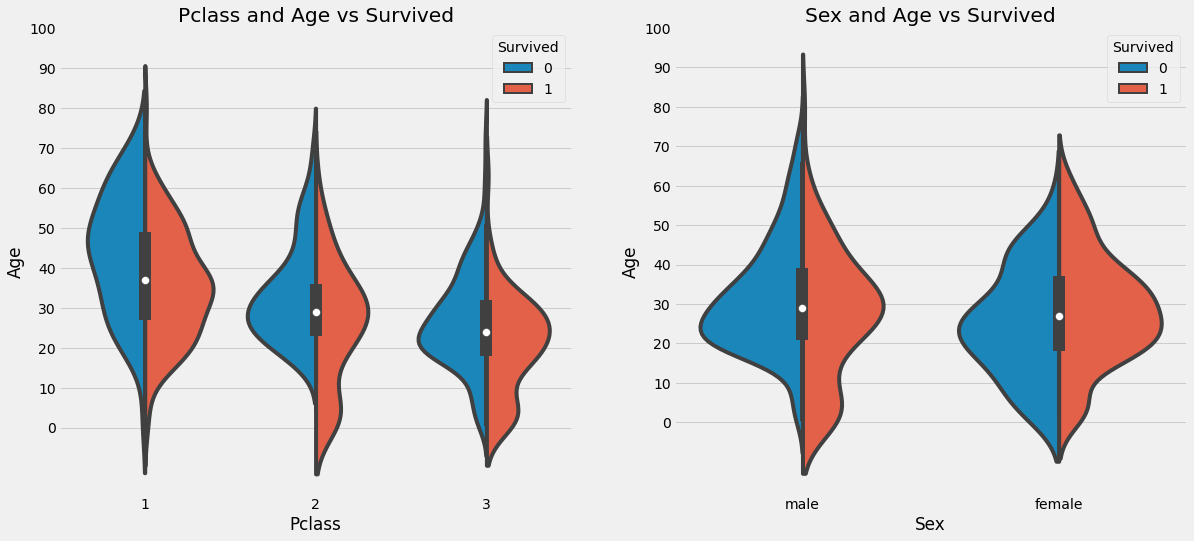

In [7]:
# 5. Age 특성 분석
# Continous Features: 연속성 특성 (ex. 나이)
print('가장 많은 나이:', data['Age'].max(), '살')
print('가장 적은 나이:', data['Age'].min(), '살')
print('평균 나이:', data['Age'].mean(), '살')

f,ax= plt.subplots(1,2, figsize= (18,8))
sns.violinplot('Pclass','Age', hue= 'Survived', data= data, split= True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue= 'Survived', data= data, split= True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [8]:
# 6. 나이를 채우기 위해 Name의 호칭만 빼온다.
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    # Name의 .전 까지 첫번재 단어를 추출하는 것이다.(호칭을 빼오는것)

# 호칭의 분포를 확인한다.
display(pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r'))


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [9]:
# 7. 호칭에서 대체할 수 있는 걸 대체한다.(Mlle → Miss)
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace= True)

In [10]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [11]:
# 8. 비어있는 나이를 호칭의 평균으로 채운다.
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age']= 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age']= 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age']= 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age']= 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age']= 46

In [12]:
data.Age.isnull().any()

False

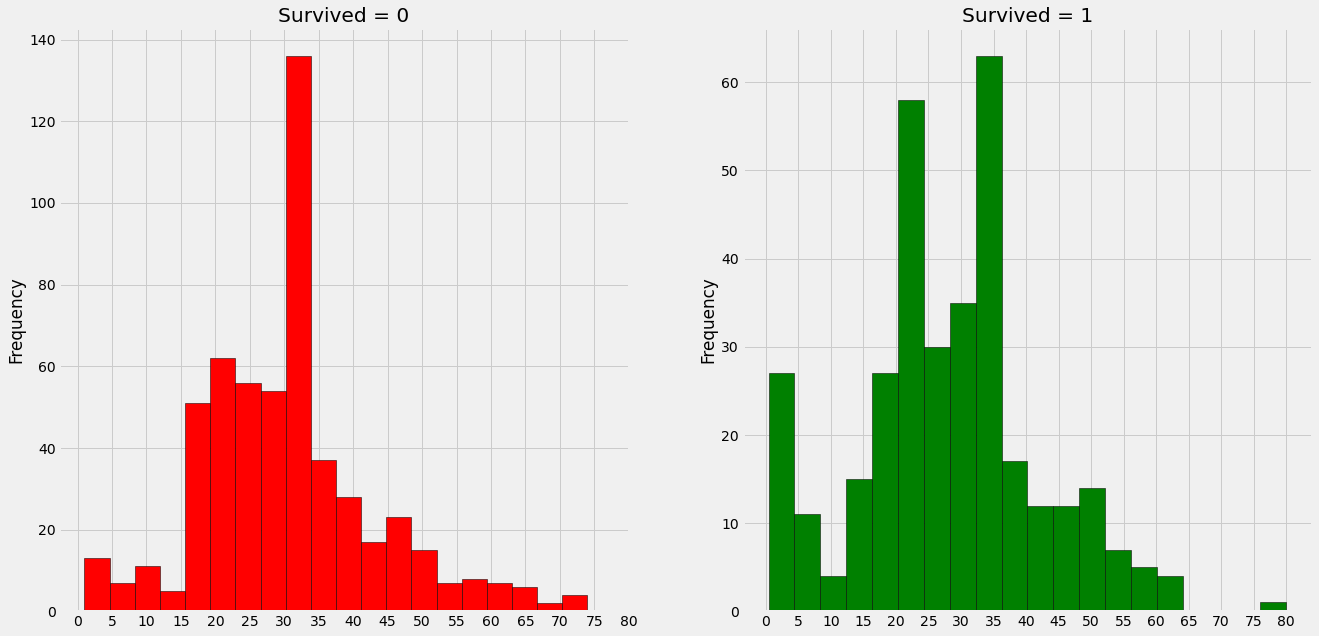

In [13]:
# 9. 생존율을 히스토그램으로 나타내기
f,ax= plt.subplots(1,2, figsize= (20, 10))
data[data['Survived']== 0].Age.plot.hist(ax= ax[0], bins= 20, edgecolor= 'black', color= 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']== 1].Age.plot.hist(ax= ax[1], bins= 20, color= 'green', edgecolor= 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()


c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


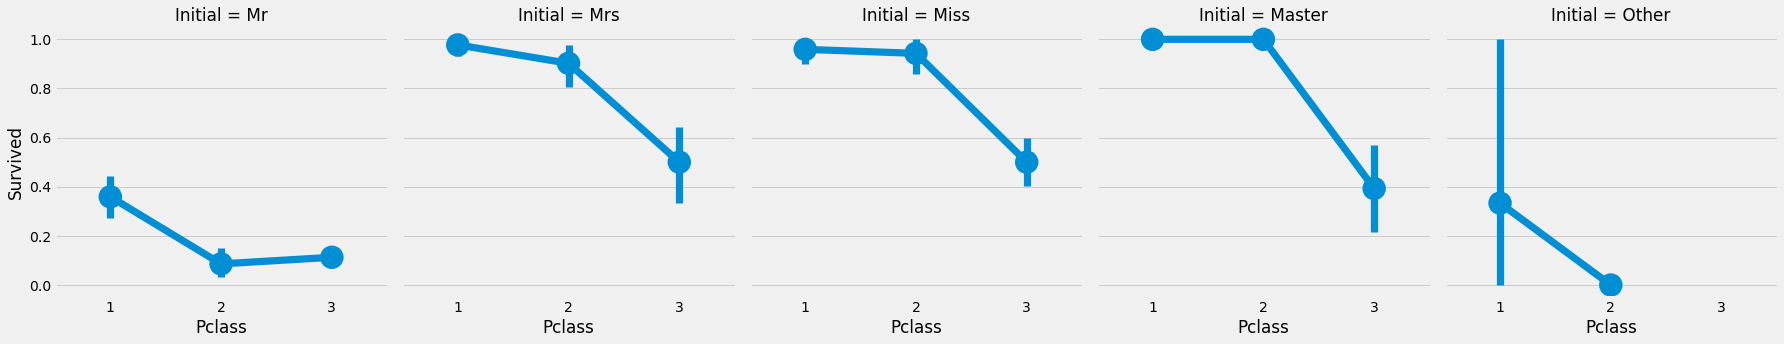

In [14]:
# 10. 호칭별 좌석등그별 생존 그래프
sns.factorplot('Pclass', 'Survived', col= 'Initial', data= data)
plt.show()

In [15]:
# 11. Embarked 특성 공학
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins= True).style.background_gradient(cmap= 'summer_r')

c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


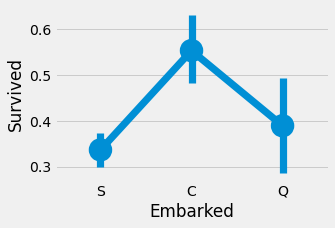

In [16]:
sns.factorplot('Embarked', 'Survived', data= data)
fig= plt.gcf()
fig.set_size_inches(5,3)
plt.show()

c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\si

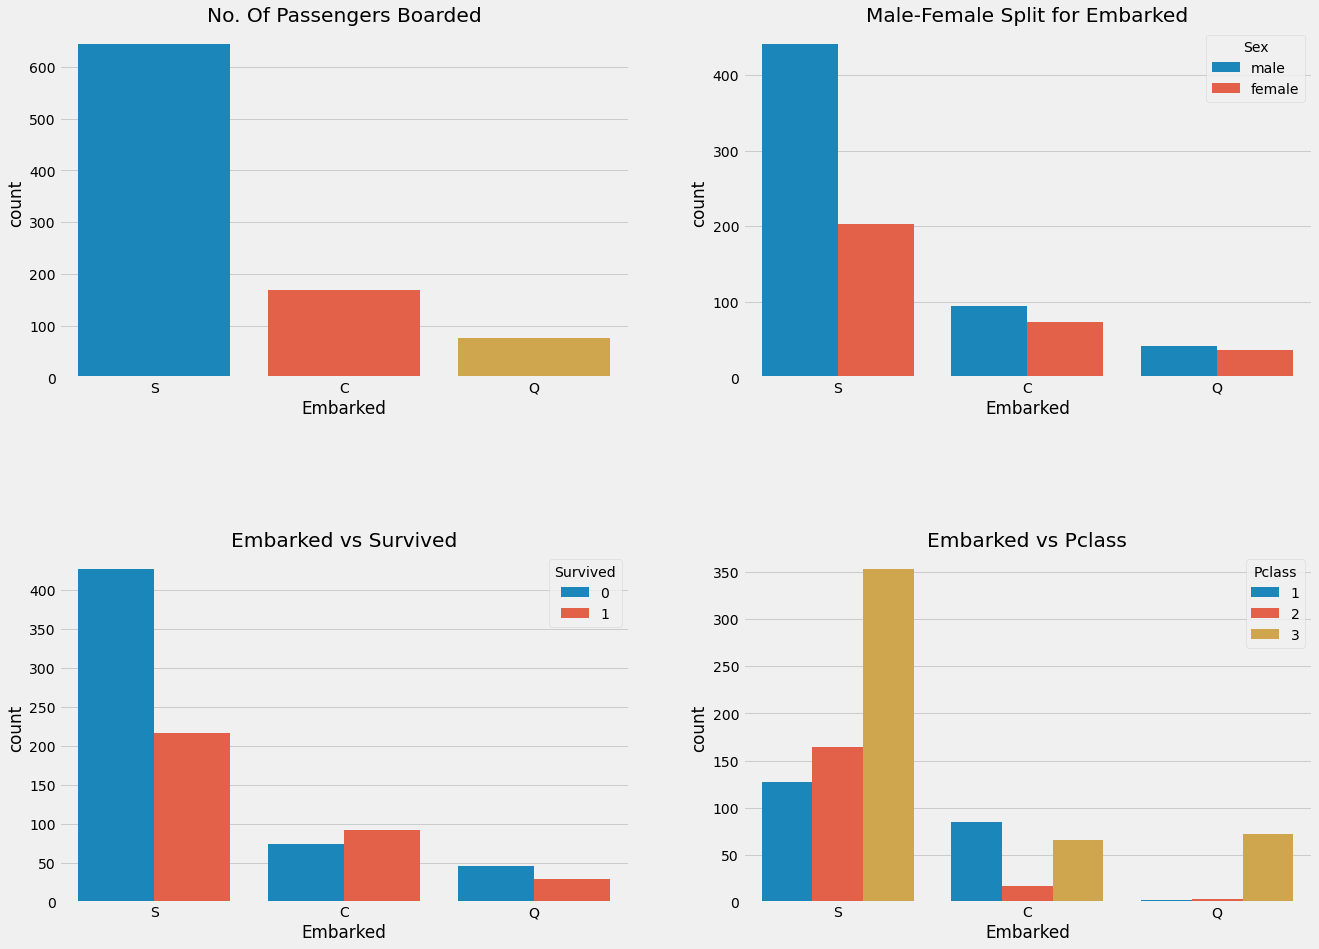

In [17]:
f,ax= plt.subplots(2,2, figsize= (20, 15))
sns.countplot('Embarked', data= data, ax= ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue= 'Sex', data= data, ax= ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue= 'Survived', data= data, ax= ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue= 'Pclass', data= data, ax= ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace= 0.2, hspace= 0.5)
plt.show()


c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


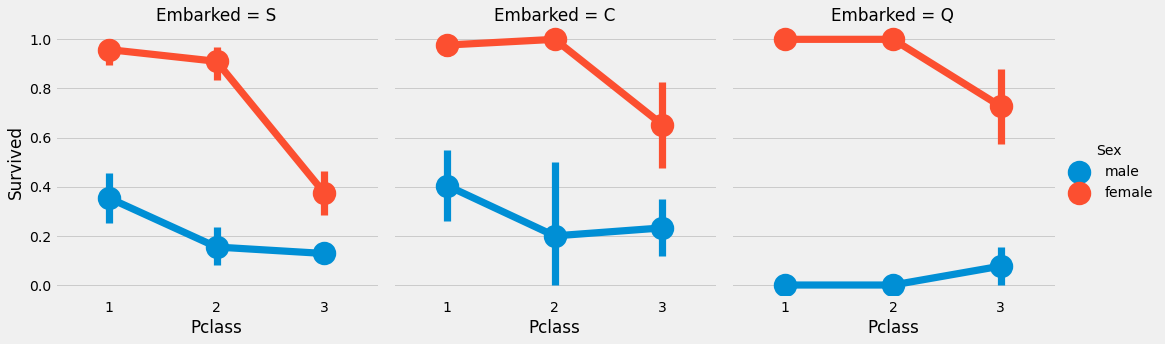

In [18]:
sns.factorplot('Pclass', 'Survived', hue= 'Sex', col= 'Embarked', data= data)
plt.show()

In [19]:
# S항구에 탑승한 사람이 가장 많기 때문에 Embarked 의 결측치를 S로 채우겠다.
data['Embarked'].fillna('S', inplace= True)

In [20]:
# SibSip 특성 탐색
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap= 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\821

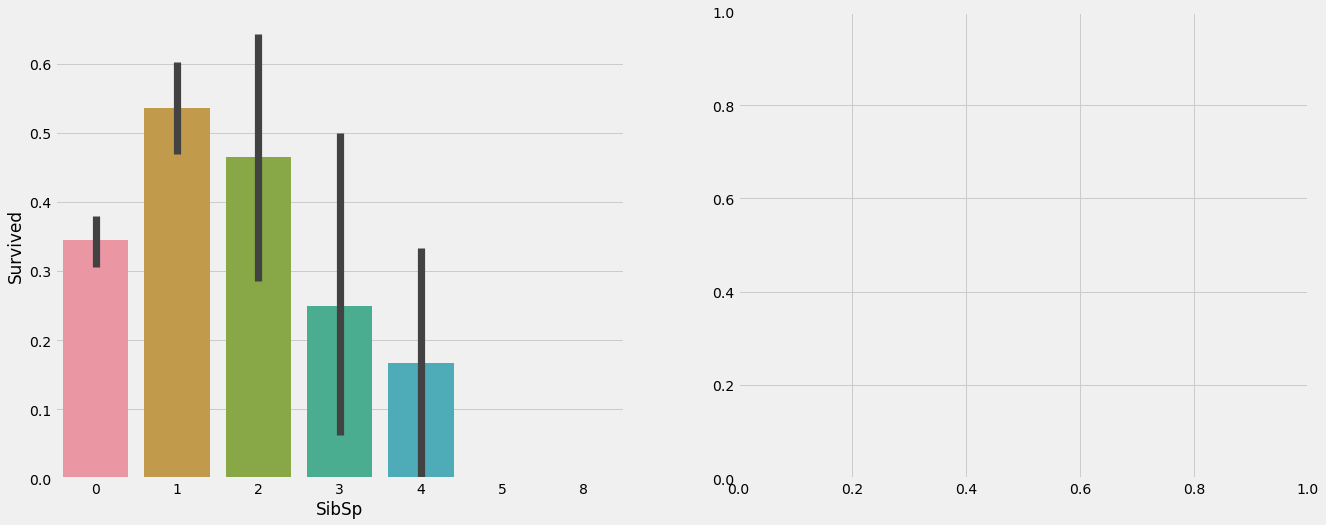

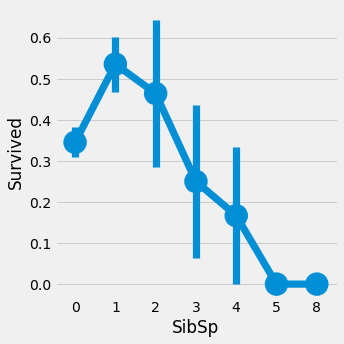

In [21]:
f,ax= plt.subplots(1,2, figsize= (20,8))
sns.barplot('SibSp', 'Survived', data= data, ax= ax[0])

sns.factorplot('SibSp', 'Survived', data= data, ax= ax[1])

In [22]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap= 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [23]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap= 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [24]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Parch vs Survived')

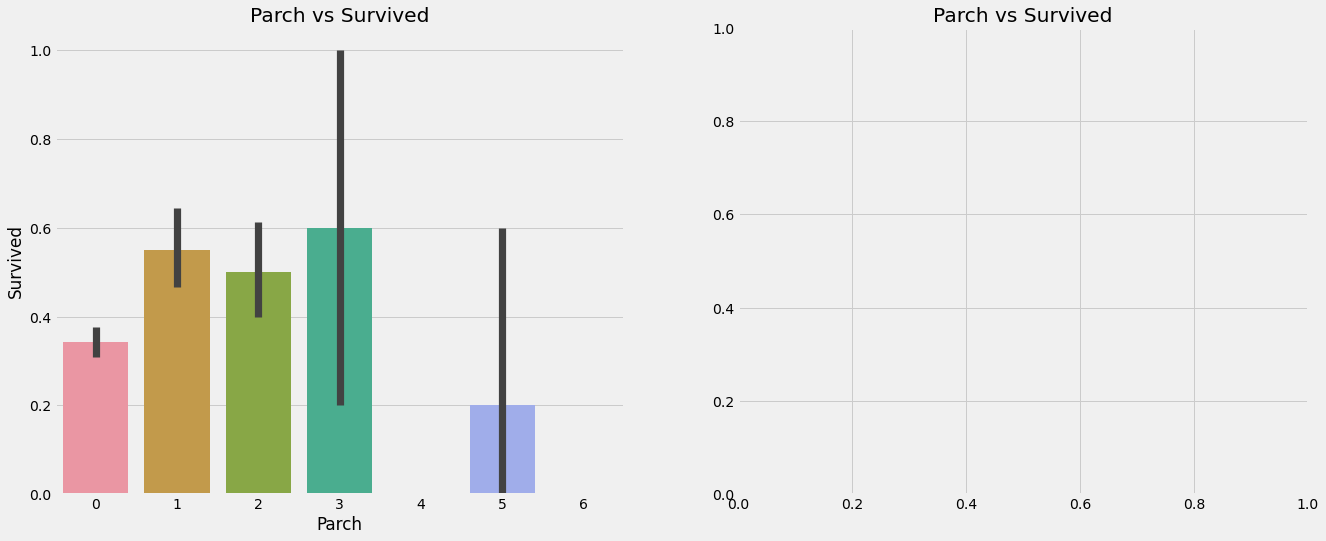

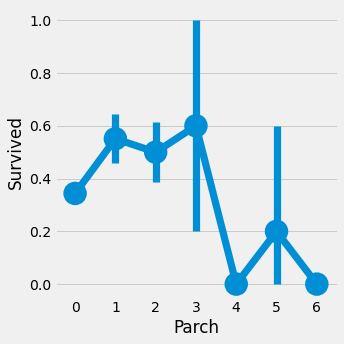

In [25]:
f, ax= plt.subplots(1,2, figsize= (20,8))
sns.barplot('Parch', 'Survived', data= data, ax= ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data= data, ax= ax[1])
ax[1].set_title('Parch vs Survived')


In [26]:
# fare 특성 분석
print('비싼거:', data['Fare'].max())
print('싼거:', data['Fare'].min())
print('중간:', data['Fare'].mean())

비싼거: 512.3292
싼거: 0.0
중간: 32.2042079685746


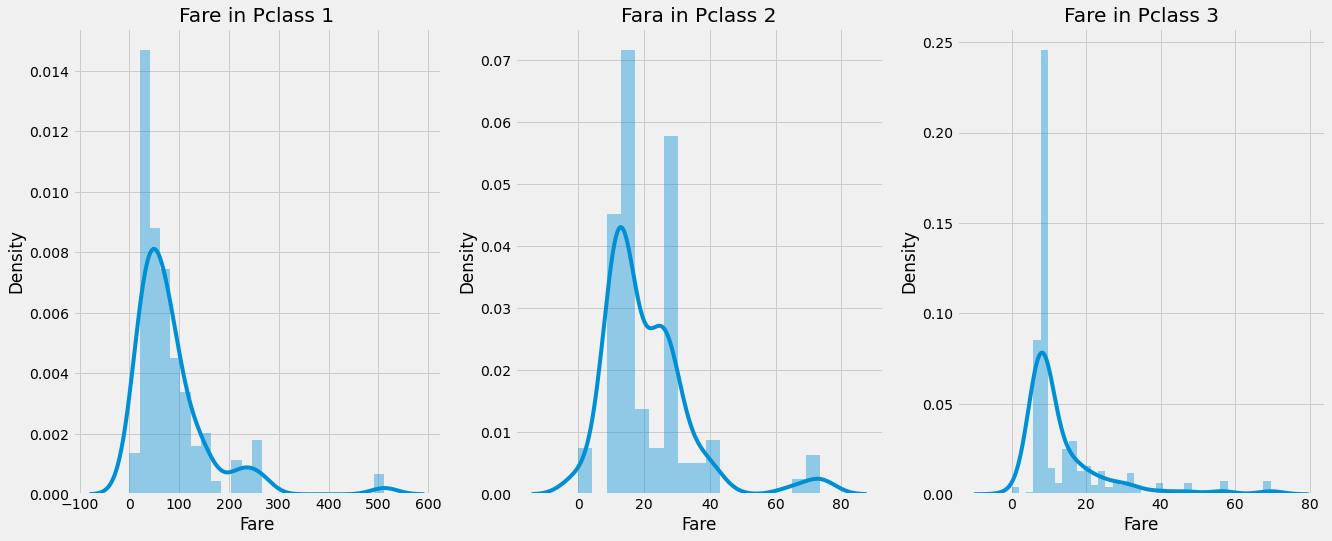

In [27]:
f,ax= plt.subplots(1,3, figsize= (20, 8))

sns.distplot(data[data['Pclass']== 1].Fare, ax= ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(data[data['Pclass']== 2].Fare, ax= ax[1])
ax[1].set_title('Fara in Pclass 2')

sns.distplot(data[data['Pclass']== 3].Fare, ax= ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

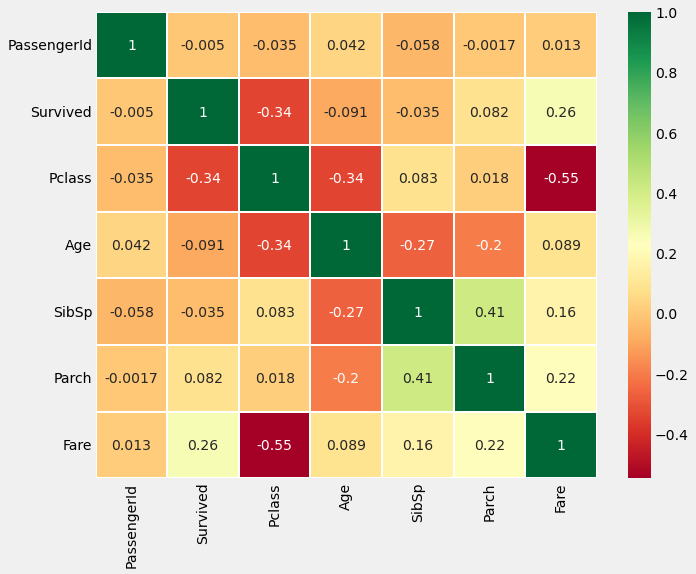

In [28]:
# 상관관계 확인
sns.heatmap(data.corr(), annot= True, cmap= 'RdYlGn', linewidths= 0.2)

fig= plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [34]:
# 연속형 특성은 사용할 수 없으므로 나이를 다섯개로 나눈다.
data['Age_band']= 0
data.loc[data['Age']<= 16, 'Age_band']= 0
data.loc[(data['Age']> 16) & (data['Age']<= 32), 'Age_band']= 1
data.loc[(data['Age']> 32) & (data['Age']<= 48), 'Age_band']= 2
data.loc[(data['Age']> 48) & (data['Age']<= 64), 'Age_band']= 3
data.loc[data['Age']> 64, 'Age_band']= 4

In [35]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap= 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


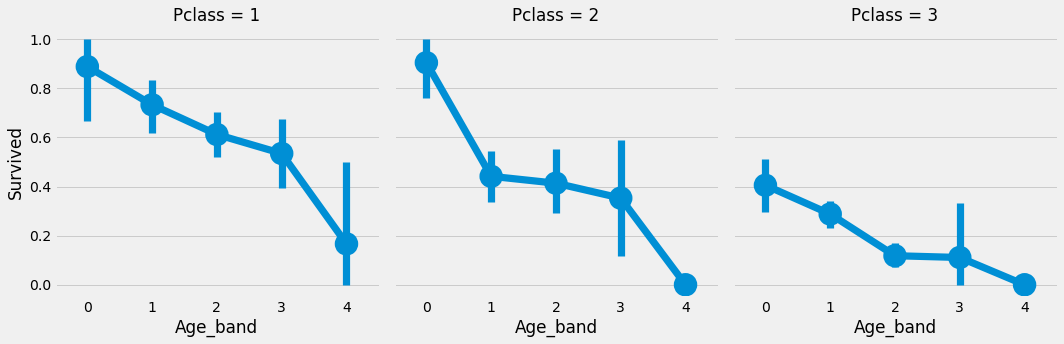

In [36]:
sns.factorplot('Age_band','Survived', data= data, col= 'Pclass')
plt.show()

Text(0.5, 1.0, 'Alone vs Survived')

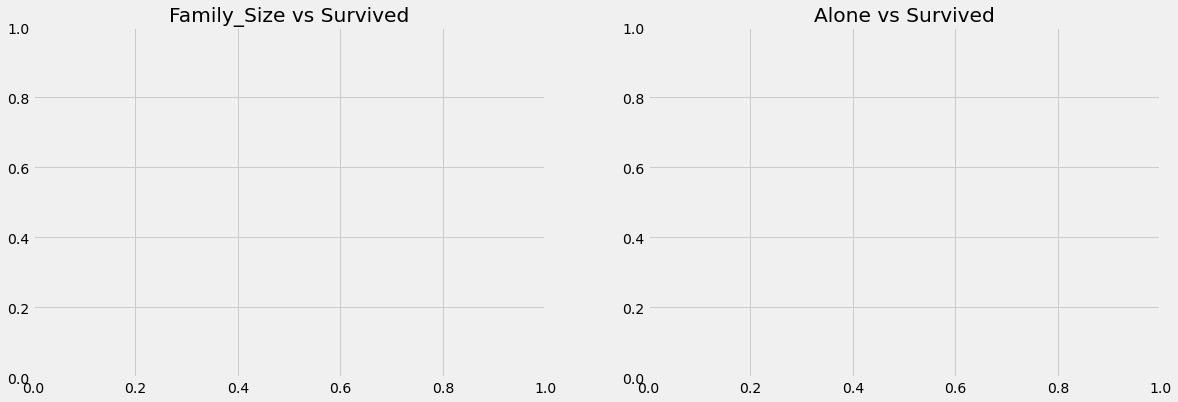

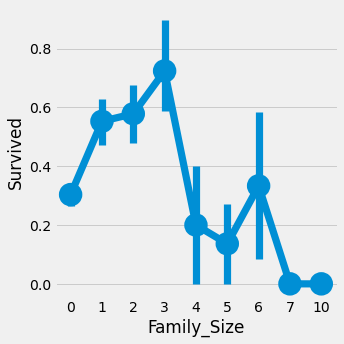

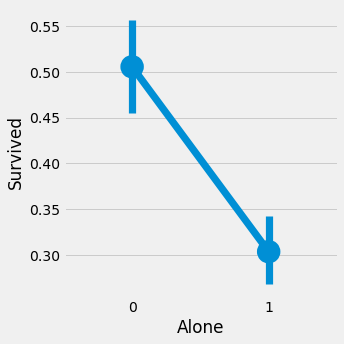

In [40]:
# 혼자인지 가족이 있는지 확인한다.
data['Family_Size']= 0
data['Family_Size']= data['Parch'] + data['SibSp']

data['Alone']= 0
data.loc[data.Family_Size== 0, 'Alone']= 1

f,ax= plt.subplots(1,2, figsize= (18,6))
sns.factorplot('Family_Size', 'Survived', data= data, ax= ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data= data, ax= ax[1])
ax[1].set_title('Alone vs Survived')


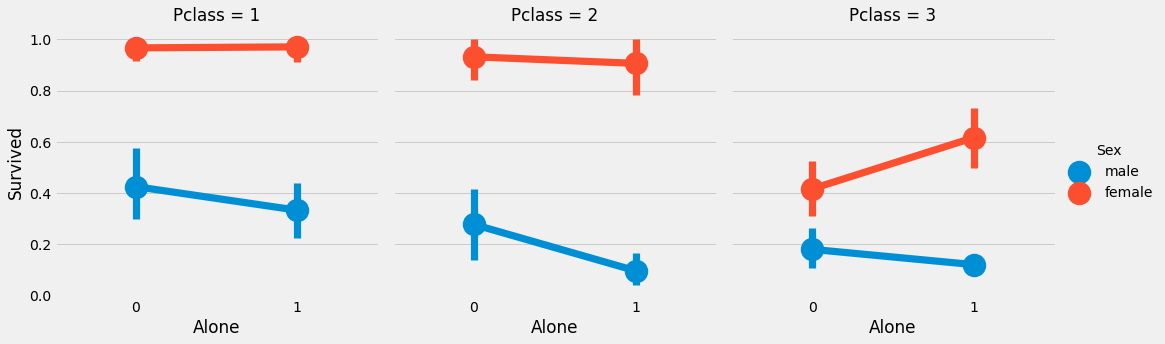

In [41]:
sns.factorplot('Alone', 'Survived', data= data, hue= 'Sex', col= 'Pclass')
plt.show()

In [42]:
# Fare 
# qcut: 연속형 데이터를 특정 개수 또는 범위로 분할하는 역할을 한다.
# 예를 들어 0부터 100까지의 숫자가 담긴 데이터를 4개의 구간으로 나눈다고 할 때
# 데이터 분포에 따라서 각 구간의 범위를 조절하여 균등하게 분하랳준다.
# 오늘은 여기까지 
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

TypeError: 'Styler' object is not callable